# Image Gradients

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Utils
IMAGE_PATH = '../assets/sudoku.jpg'

def load_img():
    return cv.imread(IMAGE_PATH, 0)

def show_img(img, cmap="gray"):
    fig = plt.figure(figsize=(15,15))
    subplot = fig.add_subplot(111)
    subplot.imshow(img, cmap=cmap)
    

## Original Image

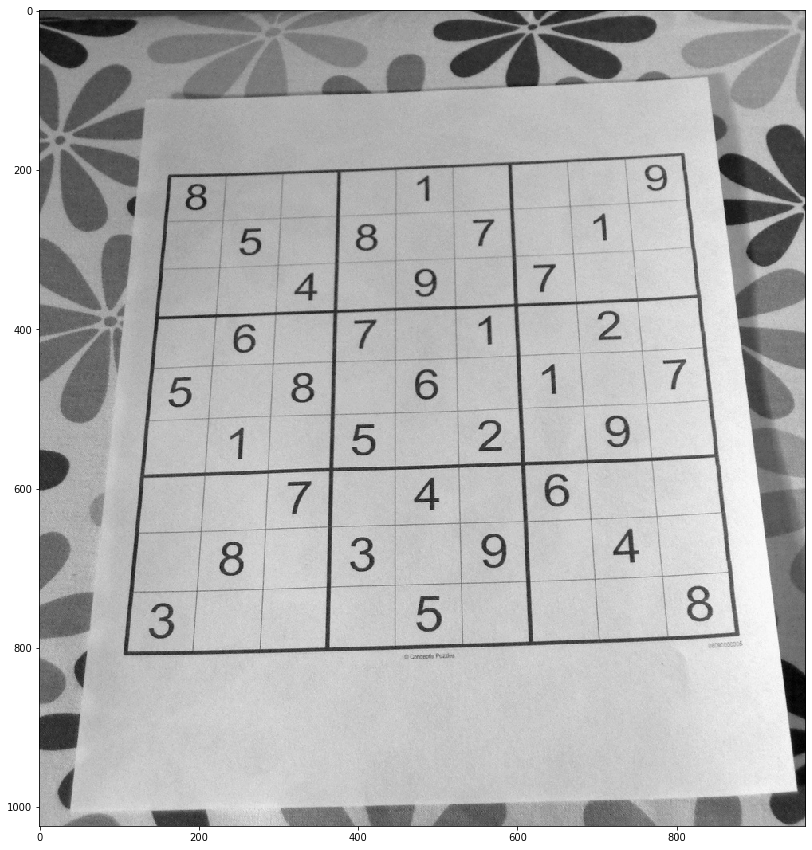

In [22]:
show_img(load_img())

## Sobel Operations

### Appling Sobel to X

In [18]:
sobel_x_img = cv.Sobel(load_img(), cv.CV_64F, 0, 1, ksize=5)
show_img(sobel_x_img)

### Appling Sobel to Y

In [19]:
sobel_y_img = cv.Sobel(load_img(), cv.CV_64F, 1, 0, ksize=5)
show_img(sobel_y_img)

### Blending X and Y

In [20]:
sobel_img = cv.addWeighted(src1=sobel_x_img, alpha=0.5,src2=sobel_y_img, beta=0.5, gamma=0)
show_img(sobel_img)

## Laplacian Operations

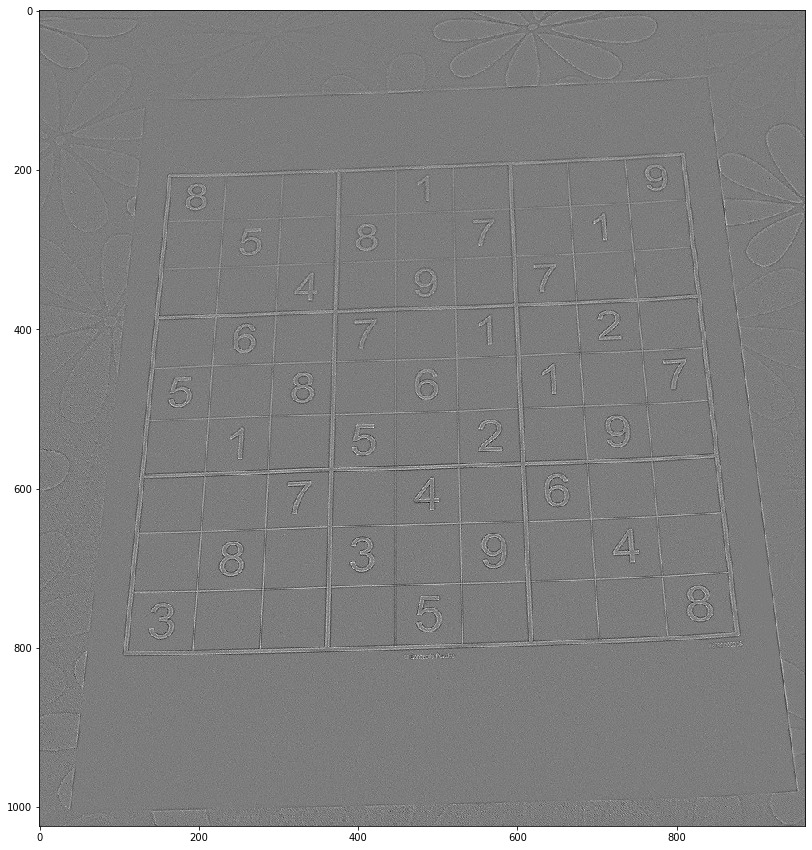

In [21]:
laplacian_img = cv.Laplacian(load_img(), cv.CV_64F)
show_img(laplacian_img)

## Sobel + Gradient + Opening + Threshold

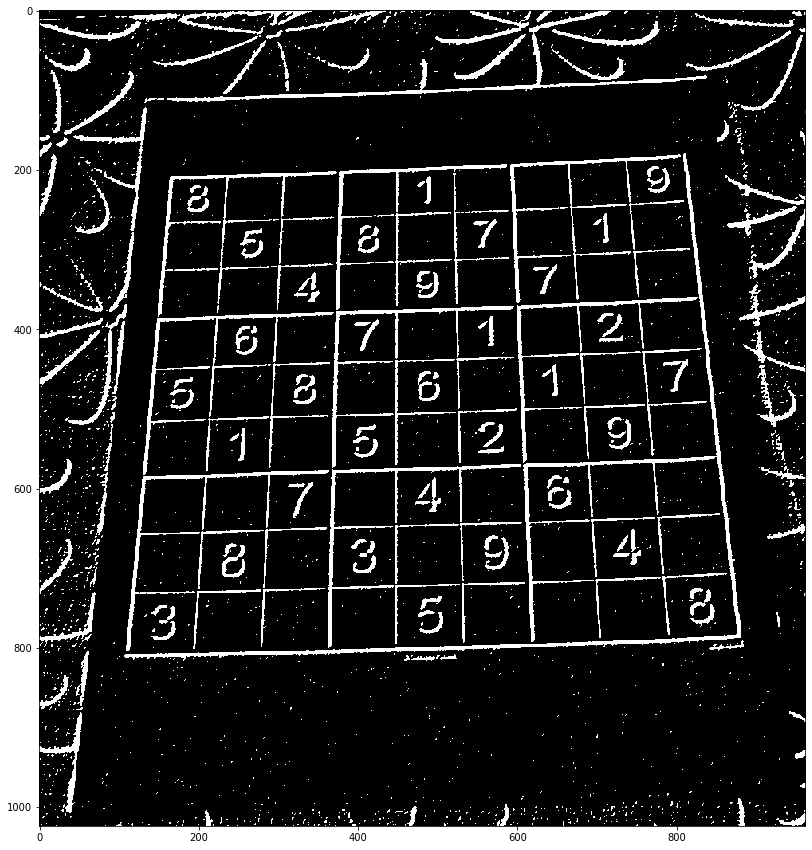

In [72]:
ret, threshold_img = cv.threshold(sobel_img, 210, 255, cv.THRESH_BINARY)
show_img(threshold_img)

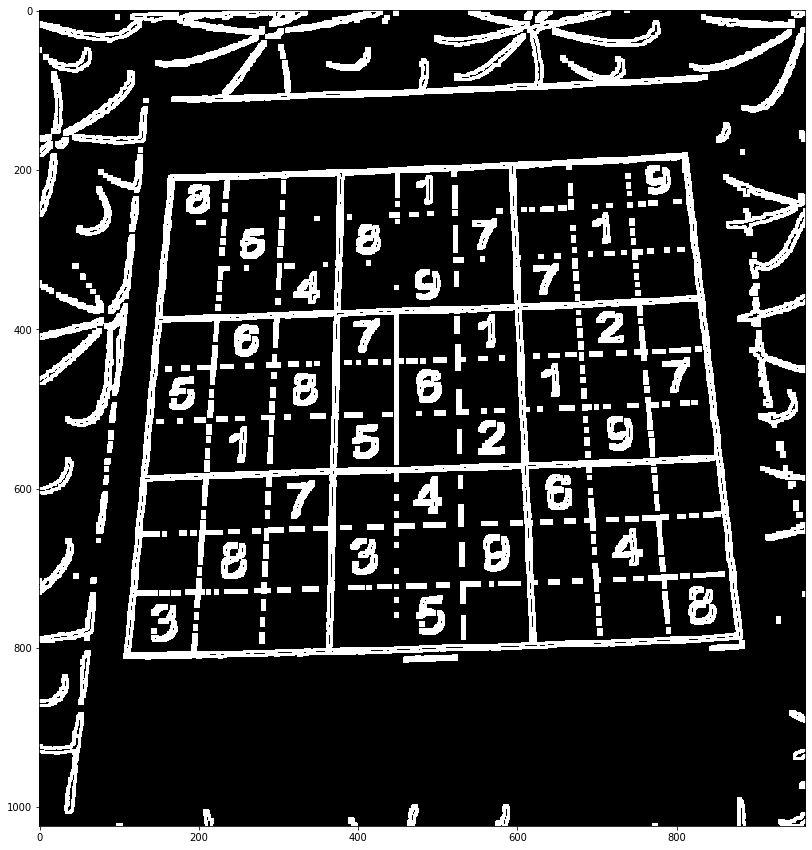

In [73]:
kernel = np.ones((3,3), np.uint8)

open_img = cv.morphologyEx(threshold_img, cv.MORPH_OPEN, kernel, )


kernel = np.ones((5,5), np.uint8)

gradient_img = cv.morphologyEx(open_img ,cv.MORPH_GRADIENT, kernel)

show_img(gradient_img)

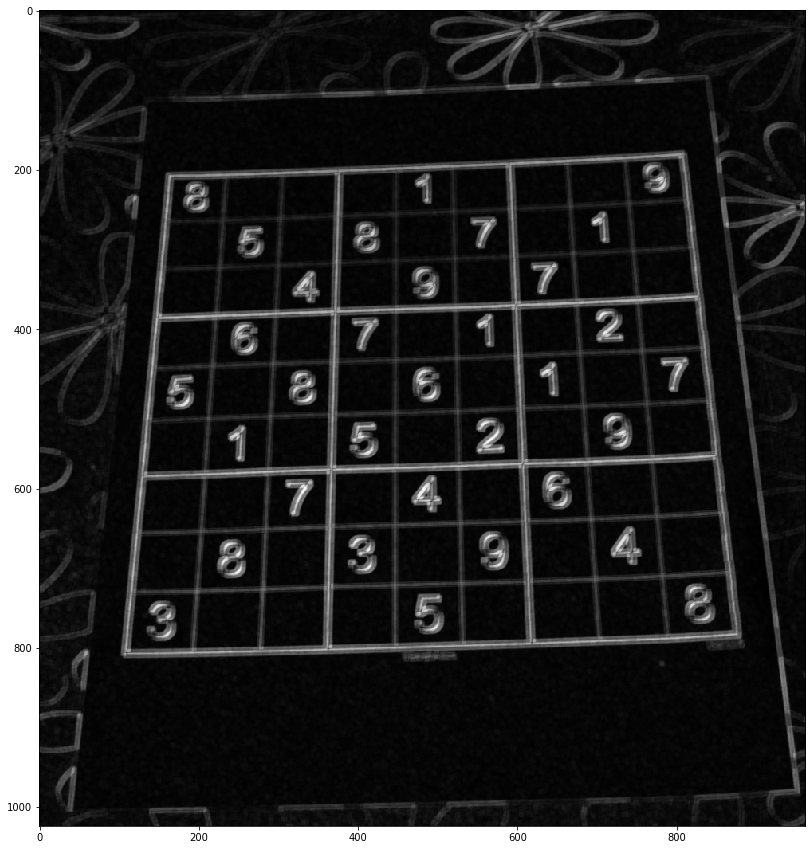

In [74]:

kernel = np.ones((5,5), np.uint8)

gradient_img = cv.morphologyEx(sobel_img ,cv.MORPH_GRADIENT, kernel)

# closing_threshold_img = cv.addWeighted(src1=closing_img, alpha=1,src2=threshold_img, beta=0.7, gamma=0)

show_img(gradient_img)